# Customer Segmentation Using Clustering Techniques and the Mall Data
<p>This is a data analysis mini-project that will allow you to perform customer segmentation on a specific group of mall customers. You will identify the best possible cluster using the K-means unsupervised machine learning algorithm to find the univariate (described by a single quantitative variable) or bivariate (described by two quantitative variables that have a relationship with each otehr) clusters.  Once these clusters are identified, summary statistics can be performed on these to identify the best marketing group. You are then able to develop better marketing campaigns based on these groups!</p>
<p>The data includes features Customer ID, Gender, Age, Annual Income in Thousands, and a Spending Score from 1 to 100 (1 is low, 100 is high based on a rating of spending patterns of the customer).</p>
<p>Our goal is to determine segments of customers based on these features in order to perfect a marketing campaign tailored to each group of customer. In order to build the clusters for our marketing campaign using Python and a powerful library called sklearn which helps with developing our powerful models, we are going to apply the K-means algorithm to build our clusters first using one variable, then two!</p>
<p>Here is a video that you can watch that describes the process if you want more information: <a href="https://www.youtube.com/watch?v=iwUli5gIcU0">Python Customer Segmentation and Clustering</a></p>
<p>Here is a video to watch if you want to review your understanding of the K-means algorithm: <a href="https://www.youtube.com/watch?v=4b5d3muPQmA">Statquest K-means algorithm explained in 8 minutes</a>
<p>To run the code in this notebook which is automatically opened in Google Colab, a powerful cloud environment for Python "Jupyter" Notebooks, simply review the "Markdown" or text cells for explanation of the code, then click on the small triangle to the right of code cells to run the code. You can even add your own code cells by clicking on the "+Code" menu item and experimenting with code or edit the code in a cell!</p>
<p>To Save your notebook, from the menu select "File . . . download . . . .ipynb".</p>
<p>To save your notebook as a PDF file, from the menu select "File . . . Print".</p>
<p>Happy Learning!</p>

#### Executing the Code
<p>To run the code in this notebook which is opened in Google Colab, a powerful cloud environment for Python "Jupyter" Notebooks, simply read the "Markdown" or text cells for explanation of the code, then click on the small triangle to the right of code cells to run the code. You can even add your own code cells by clicking on the "+Code" menu item and experimenting with code!</p><p>

To Save your notebook, from the menu select "File . . . download . . . .ipynb".</p><p>

To save your notebook as a PDF file, from the menu select "File . . . Print".</p>

Happy Learning!

# Import Libraries and Read the Input File

#### Import libaries for processing
<p>Libraries add valuable code that can be called so we don't have to write everything from scratch! You can look at the green comments that start with "#" to learn the purpose of each library.</p>

In [ ]:
# pandas lets us work with our data (reading, writing, maintaining)
# we will name it "pd" and that is how we will reference pandas when we use it in our code
import pandas as pd
# seaborn is for creating pretty charts
# we will name it "sns"
import seaborn as sns
# matplotlib.pyplot is also for pretty charts, we will call it "plt" in our code
import matplotlib.pyplot as plt
# sklearn is what we use for machine learning algorithms in our code, we are going to import KMeans
# because that is the algorithm we want to use for our clustering
# there are MANY algorithms available in sklearn!
from sklearn.cluster import KMeans
# the next two lines of code will just let us ignore pesky warnings which don't impact our output
import warnings
warnings.filterwarnings('ignore')

#### Read the input file "Mall_Customers.csv"
<p> Notice how we are using pandas or "pd" to read a csv input file. Did you know you can save Excel worksheets as "csv" or comma separated values files?</p>
<p> Our file is going to be stored in the variable "df" after we read it. Then we will refer to the dataframe or table the file is stored in as "df" when we want to use it in our analysis.</p>

In [ ]:
df=pd.read_csv('https://absentdata.com/wp-content/uploads/2023/03/Mall_Customers.csv')

In [ ]:
# Let's look at the first five records with the "head" command. You can look at the last five
# records with df.tail()
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis
<p>Remember, Univariate Analysis means analyzing one variable with our cluster analysis using the K-means algorithm. We will first complete some exploratory analysis to learn more about our data through charts.</p>

In [ ]:
# Let's "describe" the table or dataframe with statistical measures like count and mean
df.describe()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,1.270000,1.660000
std,13.969007,26.264721,25.823522,0.748264,1.277718
min,18.000000,15.000000,1.000000,0.000000,0.000000
25%,28.750000,41.500000,34.750000,1.000000,1.000000
50%,36.000000,61.500000,50.000000,1.000000,1.000000
75%,49.000000,78.000000,73.000000,2.000000,3.000000
max,70.000000,137.000000,99.000000,2.000000,4.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

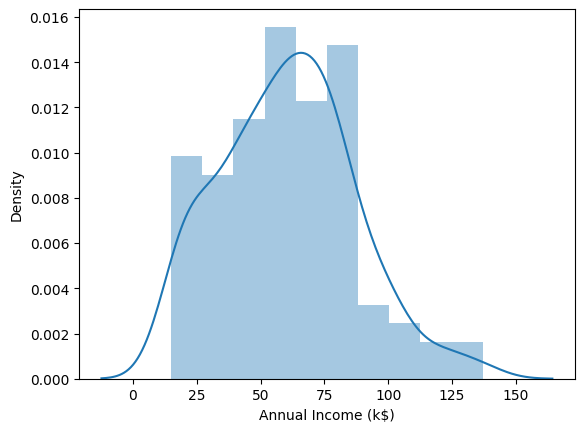

In [ ]:
# Let's use seaborn or "sns" to create a distribution plot with the "Annual income (k$)" feature from our data
sns.distplot(df['Annual Income (k$)'])

In [ ]:
# Let's put the column names in a variable called "columns" - we will be using it soon!
# You won't see any output from this cell, it just creates the variable in memory called "columns"
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']

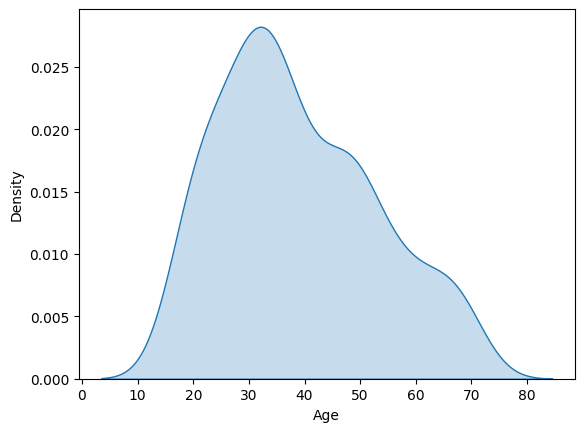

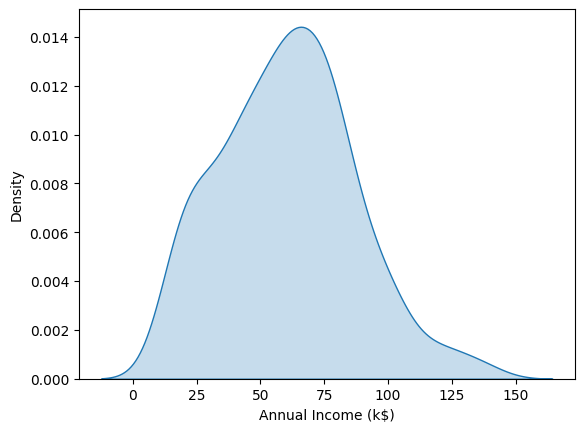

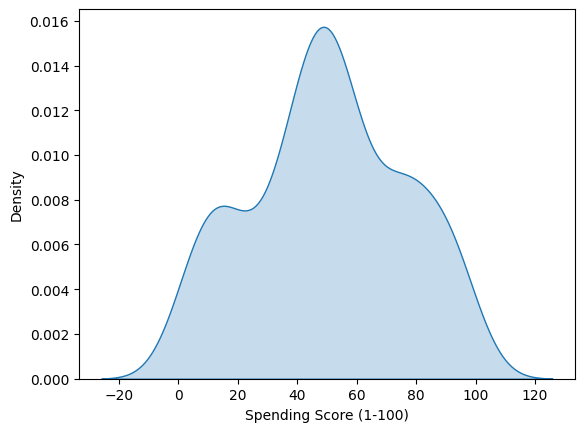

In [ ]:
# here we are using that "columns" variable and the loop again
# to see more than one Kernel Density Plot
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True);


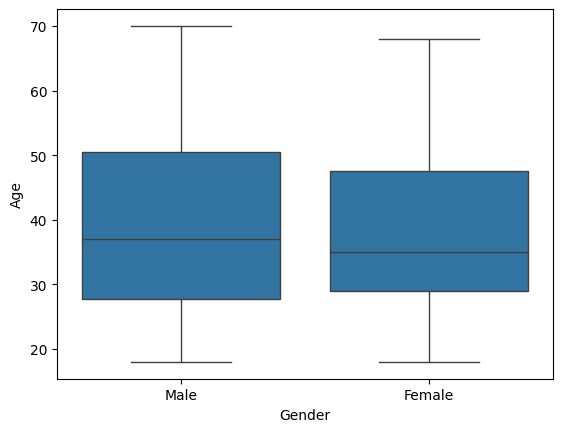

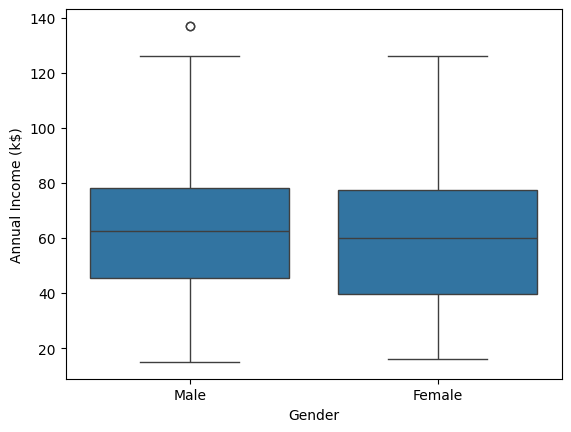

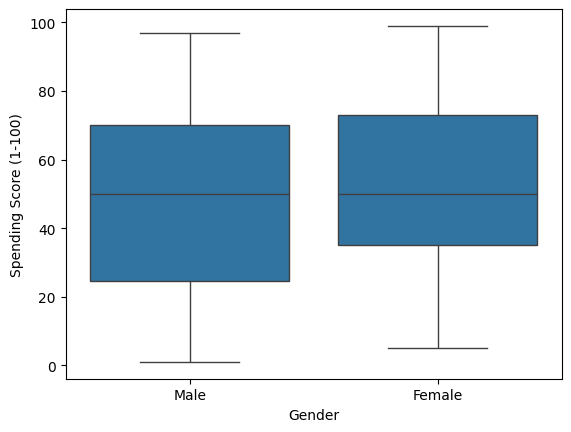

In [ ]:
# Just for fun, here are some boxplots
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i]);


In [ ]:
# Lets see the percent of records by Gender
# Look's like we have a few more Female records (normalize=true makes this a percent rather than a simple count)
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis
<p>Now we are going to have some fun with two variables at a time!</p>

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

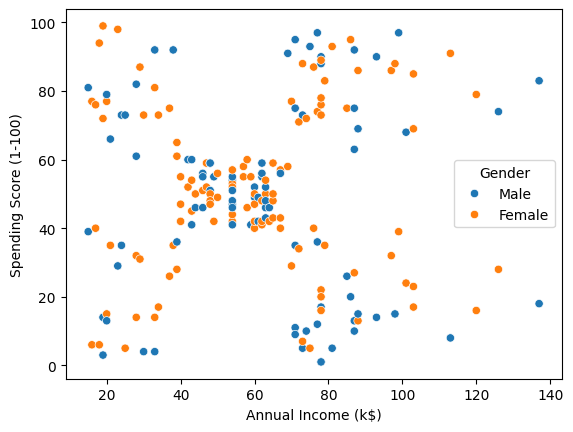

In [ ]:
# Let's use seaborn (sns) for scatterplots.
# Seaborn is so powerful!
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)', hue='Gender')

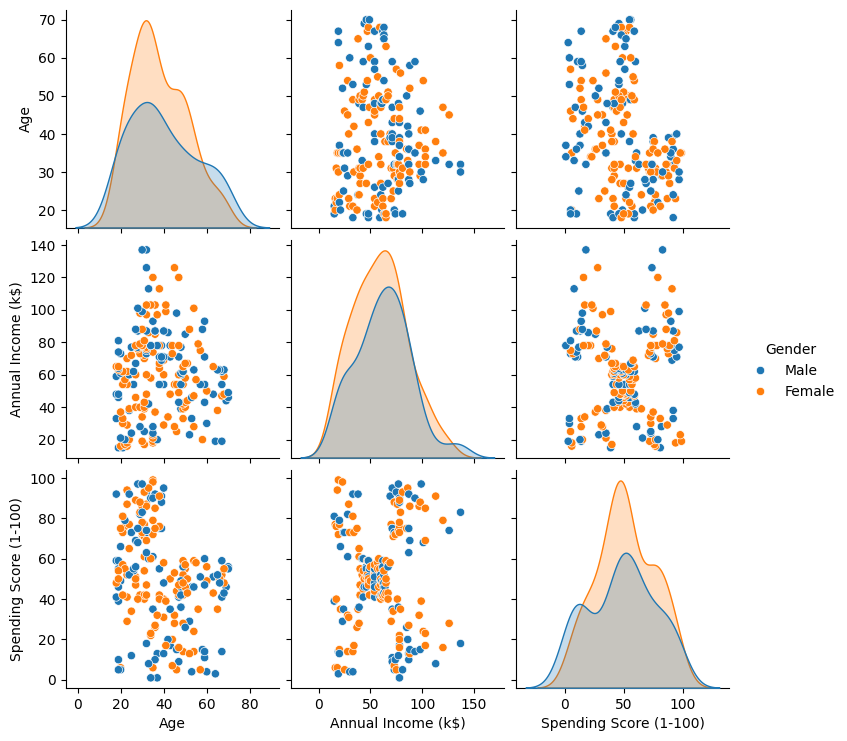

In [ ]:
# Now we will use seaborn (sns) to create pairplots for all of the data at once
# First we are going to make remove the unique variable "Customer ID" from df
# Then we will make our pairplots - it doesn't make sense to use the unique identifier
df = df.drop(['CustomerID'], axis=1)
sns.pairplot(df,hue='Gender')

In [ ]:
# Let's use the group by command
# to create a summary table of the averages
# by Gender
df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [17]:
# How about a correlation matrix? We are learning
# more and more about the data before we try to cluster
# the data into groups for our marketing campaign
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
#df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

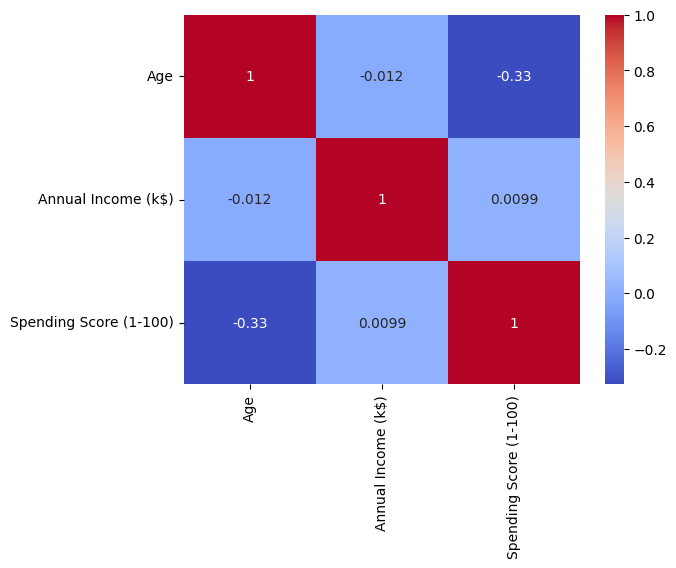

In [19]:
# a heatmap gives us a different way to look at the correlations
# it is more visual!
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(),annot=True,cmap='coolwarm')

# Clustering - Univariate and Bivariate
<p>We are now going to use the kmeans algorithm to cluster our customers from the data in "df". Our clusters will be built using one variable first (Univariate), then two variables (Bivariate). We won't do Multivariate (more than two variables) because that requires some work with the categorical "Gender" feature but the video that is linked above covers clustering with more than two variables.</p>
<p>Want to review that kmeans algorithm? There is a video linked above from statsquest but do you want it explained "like I'm five"? Here you go - kmeans explained with a box of crayons!</p>
<p>Alright, imagine you have a big box of crayons, but you're not quite sure how many different colors are in there. Now, let's say you want to organize them into groups based on their colors, but you're not sure how many groups there should be.</p><p>

So, here's what you do with the K-means algorithm:<br><br>

Pick Some Groups: First, you guess how many groups you want. Let's say you decide on three groups.<br><br>

Find Centers: Next, you pick three crayons randomly from the box and decide that those will be the centers of your groups. These crayons are like the leaders of their own groups.<br><br>

Sort Crayons: Now, you go through all the crayons in the box and put each one into the group of the crayon that it's closest to in color. So, if a crayon is more like the blue center crayon than the red or green center crayon, you put it in the blue group.<br><br>

Move Centers: After you've sorted all the crayons, you look at each group and find the average color of all the crayons in that group. Then, you move the center of each group to be at that average color.

Repeat: Now, you do steps 3 and 4 again and again until the centers of the groups stop moving much. This means the crayons have settled into their groups pretty well.<br><br>

Done!: Once the centers stop moving much, you're done! You've organized your crayons into groups based on their colors, and you know how many groups there are.<br><br></p><p>

So, K-means is like sorting crayons into color groups by guessing how many groups there should be, picking some starting crayons as leaders for each group, and then moving those leaders around until the groups make sense.</p>
<p> Now on to our Python example!</p>

In [20]:
# create our clustering "object" using the kmeans algorithm
# remember, we imported the code behind this earlier with the sklearn library!
clustering1=KMeans(n_clusters=3)

In [21]:
# we decided on 3 clusters, kind of randomly, and we are going to use Annual Income to create the clusters
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [22]:
# this looks kind of weird, but it is the clustering assignment for
# each record - 0, 1 or 2 which represent the three clusters
# Python and lots of stuff in code often starts with 0
# when it is numbering things
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [23]:
# We should create a new attribute called "Income Cluster"
# in our dataframe df
# this shows which cluster was assigned according to
# our univariate clustering using Kmeans by that income variable
# then we will just peek at the first five records again
df['Income Cluster']=clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [24]:
# Let's see the number of records from our file "df" in each cluster labeled 0, 1 or 2
df['Income Cluster'].value_counts()

Income Cluster
1    92
2    72
0    36
Name: count, dtype: int64

#### Clustering Inertia
<p> Here is a new term for you! Remember the box of crayons?</p>
<p>Revisiting those crayons, remember you've organized them into different color groups using the K-means algorithm. Now, for each crayon in a group, you measure how far it is from the center of its group. Then, you add up all these distances for every crayon in every group.</p><p>

The clustering inertia is essentially the sum of all these distances. If the crayons within each group are very close to their group's center, the clustering inertia will be low because the sum of these distances will be small. But if the crayons within each group are spread out and far from their group's center, the clustering inertia will be higher because the sum of these distances will be larger.</p><p>

So, in simpler terms, clustering inertia measures how tightly packed the crayons are within their groups. A lower clustering inertia usually means better clustering because it suggests that the groups are more cohesive and well-separated.</p>

In [25]:
# the lower this number is, the more tightly packed the crayons are
# of course, we need to think in terms of records and their income feature!
clustering1.inertia_

23528.15217391306

#### Inertia Scores for Different Numbers of Clusters - Which is Best?
<p>For the next code cell, we are going to look through creating the clusters using K-means for 1 cluster, then two clusters, etc. all the way to 10 clusters. The variable inertia_scores will contain the inertia scores for clustering the data for each of those 1 to 10 clusters using the annual income data. These scores can be used to evaluate the optimal number of clusters for the dataset.</p><p> Typically, you would plot these scores and look for an "elbow point" where the inertia starts to decrease at a slower rate, which indicates a good number of clusters to use.</p>
<p>We can also just look for the lowest inertia score! Which number of clusters is best?</p>
<p>Notice how the third score is the closest to our previous inertia score for 3 clusters. Slight differences are caused by the way the algorithm works each time it is applied.</p>

In [26]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [ ]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5050.9047619047615,
 3949.275613275612,
 2822.4996947496966,
 2189.2563714063717,
 1765.9476190476198]

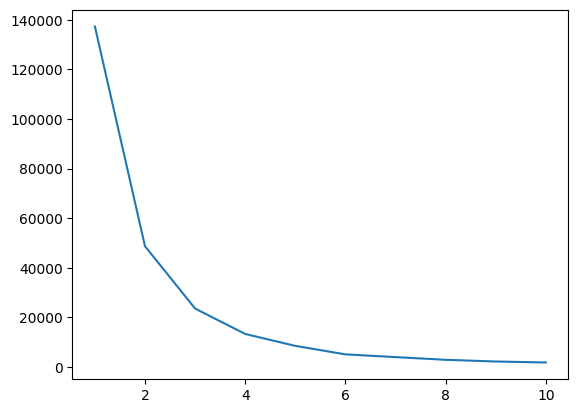

In [27]:
# this is the "elbow" plot
# the best number of clusters is where the line
# forms the elbow or quits dropping
plt.plot(range(1,11),inertia_scores)

In [29]:
# Now for our marketing group, let's
# see the characteristics of the customers that
# were assigned to each cluster! We can then
# build marketing campaigns around this new knowledge.
# Just imagine if we had MORE data on our customers!
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)',
                              'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.184783,66.717391,50.054348
2,38.930556,33.027778,50.166667


# Bivariate Clustering
<p>Let's explore the clustering using two variables! This is called Bivariate Clustering. Do you think we will be able to learn more about our customers with more than one variable? Will this help our marketing campaign?</p>

In [30]:
# We are going to use the K-means algorithm to create 5 clusters
# using the annual income and the spending score
# We will go ahead and build the clusters and assign the
# clustering labels, then peek at the data frame!
clustering2=KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster']=clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,3
1,Male,21,15,81,2,0
2,Female,20,16,6,2,3
3,Female,23,16,77,2,0
4,Female,31,17,40,2,3


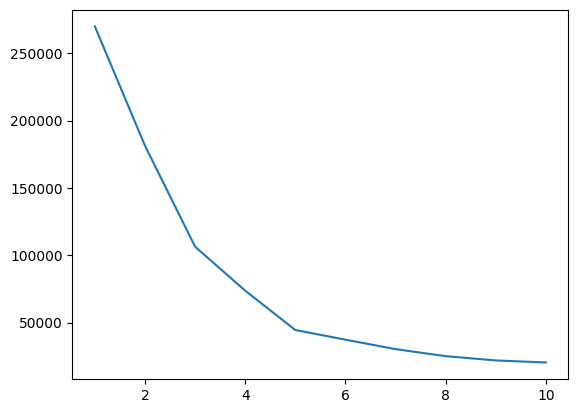

In [31]:
# Let's work with those inertia scores  . .
# We built five clusters, is this the best number of clusters
# based on the inertia scores?
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

plt.plot(range(1,11),inertia_scores2)

In [32]:
# let's plot the clusteres
# We are going to create a variable with the centers
# we will use that to highlight those points in our clustering chart
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']

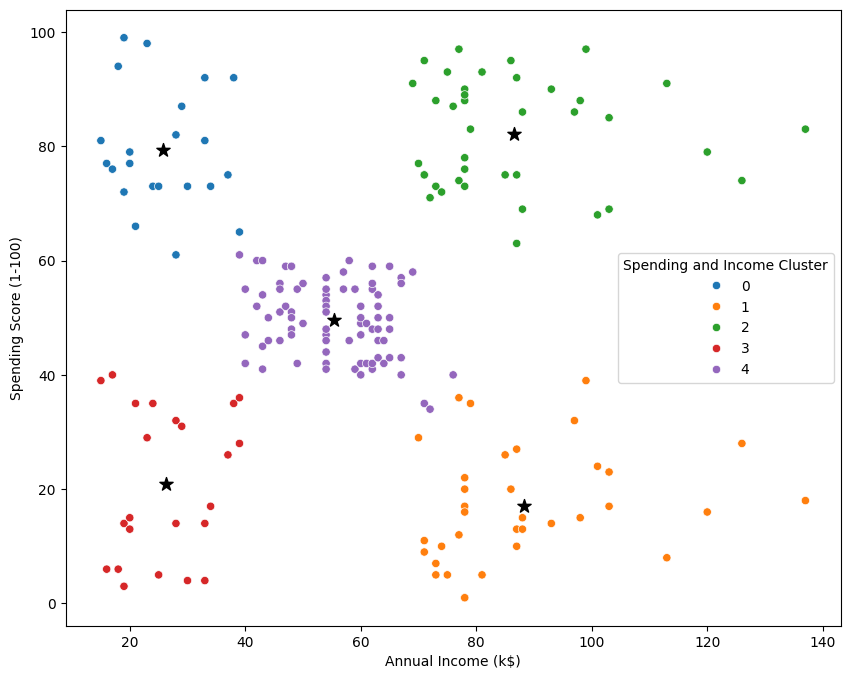

In [33]:
# Now let's create this cool clustering chart!
# Question: How would you describe each cluster? Can you use this for more effective marketing?
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker=('*'))

sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivariate.png')


In [34]:
# here is a table of the percentages of records in each cluster
# Which cluster is the largest?
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.590909,0.409091
1,0.457143,0.542857
2,0.538462,0.461538
3,0.608696,0.391304
4,0.592593,0.407407


In [35]:
# Here is another table to help us explore and understand our customers.
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
                              'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,25.272727,25.727273,79.363636
1,41.114286,88.200000,17.114286
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,42.716049,55.296296,49.518519


# The End
<p>Now you should have a better understanding of clustering with the K-means algorithm!</p><p>You as an analyst are getting ready to talk to the Marketing Director . . . what will you tell them about your cluster analysis?</p>
